# Hands-On Exercise 2.3:
# Transforming Data in Python in Preparation for Analysis
***

## Objectives

### In this exercise, you will familiarize yourself with Python syntax commands for transforming data sets in Python in preparation for analysis.

### Overview
In this exercise, you will use Python commands to rescale data, detect and deal with
missing values, bin numeric data into ranges, convert between data types, combine data sets both vertically and horizontally, and, finally, write your own functions as well as use some built-in functions.<br><br>

**Pre-step: Execute the following cell in order to suppress warning messages**

In [2]:
import warnings
warnings.filterwarnings("ignore")

**Major Step: Querying from data sets**

1. ❏ Import the **pandas** and **statsmodels.api** libraries

In [1]:
import pandas as pd
import statsmodels.api as sm

2. ❏ Import a dataset called **mtcars** and preview it<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;*Syntax:* &nbsp;&nbsp;&nbsp; ***mtcars = sm.datasets.get_rdataset("mtcars").data***

In [3]:
mtcars = sm.datasets.get_rdataset("mtcars").data

3. ❏ Import **preprocessing** from **sklearn**

In [4]:
from sklearn import preprocessing as pre

4. ❏ Scaling features to lie between a given minimum and maximum value (eg. 0 and 1) can be achieved using a MinMaxScaler. Use the following syntax to rescale the first four columns of the mtcars data set using the **.MinMaxScaler()** method<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;***scaler = preprocessing.MinMaxScaler()<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;MinMaxScaled = pd.DataFrame(scaler.fit_transform(mtcars.iloc[:,[0,1,2,3]]), columns=mtcars.columns[0:4])***

In [8]:
mtcars.columns

Index(['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear',
       'carb'],
      dtype='object')

In [20]:
scaler = pre.MinMaxScaler()
minMaxScaled = pd.DataFrame(scaler.fit_transform(mtcars.iloc[:, [0,1,2,3]]), columns=mtcars.columns[0:4]) 
minMaxScaled
########################
# How to avoid memory problems here? No inplace possible?

,mpg,cyl,disp,hp
0,0.451064,0.5,0.221751,0.204947
1,0.451064,0.5,0.221751,0.204947
2,0.527660,0.0,0.092043,0.144876
3,0.468085,0.5,0.466201,0.204947
4,0.353191,1.0,0.720629,0.434629
5,0.327660,0.5,0.383886,0.187279
6,0.165957,1.0,0.720629,0.681979
7,0.595745,0.0,0.188576,0.035336
8,0.527660,0.0,0.173859,0.151943
9,0.374468,0.5,0.240708,0.250883


5. ❏ Use the **.describe()** method to view the distribution of data in the scaled columns

In [10]:
minMaxScaled.describe()

,mpg,cyl,disp,hp
count,32.000000,32.000000,32.000000,32.000000
mean,0.412367,0.546875,0.398159,0.334585
std,0.256466,0.446480,0.309151,0.242272
min,0.000000,0.000000,0.000000,0.000000
25%,0.213830,0.000000,0.124033,0.157244
50%,0.374468,0.500000,0.312297,0.250883
75%,0.527660,1.000000,0.635819,0.452297
max,1.000000,1.000000,1.000000,1.000000


6. ❏ Normalization is used to scale data (by row) on a scale of 0 to 1 such that individual rows have a unit norm. Rescale the first four columns of the mtcars data set using the **.normalize()** function<br><br>
*Info: **.normalize()** is a row-wise operation whereas **.scale()** in the next step is performed column-wise*

In [22]:
normalized_1 = pd.DataFrame(pre.normalize(mtcars.iloc[:, [0,1,2,3]]), columns=mtcars.columns[0:4])
print(normalized_1.describe())

scaler = pre.Normalizer()
normalized_2 = pd.DataFrame(scaler.fit_transform(mtcars.iloc[:, [0,1,2,3]]), columns=mtcars.columns[0:4]) 
normalized_2.describe()

             mpg        cyl       disp         hp
count  32.000000  32.000000  32.000000  32.000000
mean    0.107579   0.025060   0.812209   0.550192
std     0.088739   0.006742   0.082984   0.106850
min     0.020203   0.015541   0.630463   0.384683
25%     0.044004   0.019648   0.764689   0.440598
50%     0.080668   0.024256   0.818878   0.562602
75%     0.141266   0.027959   0.896272   0.614110
max     0.331693   0.041313   0.917006   0.766880


,mpg,cyl,disp,hp
count,32.000000,32.000000,32.000000,32.000000
mean,0.107579,0.025060,0.812209,0.550192
std,0.088739,0.006742,0.082984,0.106850
min,0.020203,0.015541,0.630463,0.384683
25%,0.044004,0.019648,0.764689,0.440598
50%,0.080668,0.024256,0.818878,0.562602
75%,0.141266,0.027959,0.896272,0.614110
max,0.331693,0.041313,0.917006,0.766880


7. ❏ Shift the distribution of each of these attributes to having a mean of zero and a
standard deviation of one (unit variance).<br><br>
*Hint: Use the **.scale()** method rather than .normalize()*

In [18]:
scaledDistribution_1 = pd.DataFrame(pre.scale(mtcars.iloc[:, [0,1,2,3]]), columns=mtcars.columns[0:4])

scaler = pre.StandardScaler()
scaledDistribution_2 = pd.DataFrame(scaler.fit_transform(mtcars.iloc[:, [0,1,2,3]]), columns=mtcars.columns[0:4]) 
scaledDistribution_2.describe()

,mpg,cyl,disp,hp
0,0.153299,-0.106668,-0.579750,-0.543655
1,0.153299,-0.106668,-0.579750,-0.543655
2,0.456737,-1.244457,-1.006026,-0.795570
3,0.220730,-0.106668,0.223615,-0.543655
4,-0.234427,1.031121,1.059772,0.419550
5,-0.335572,-0.106668,-0.046906,-0.617748
6,-0.976163,1.031121,1.059772,1.456847
7,0.726459,-1.244457,-0.688779,-1.254944
8,0.456737,-1.244457,-0.737144,-0.765933
9,-0.150138,-0.106668,-0.517448,-0.351014


8. ❏ Load the **titanic** dataset into a pandas data frame from the file **titanic.csv**

In [48]:
titanic = pd.read_csv("titanic.csv")

9. ❏ View the 25th through to the 29th row of the **Age** column

In [25]:
titanic[25:30]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,NaN,S
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S


10. ❏ Use the **isnull()** method to check for missing values.

In [45]:
titanic.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


11. ❏ Calculate the **mean** of the Age column

In [28]:
titanic.Age.mean()

29.69911764705882

12. ❏ Replace missing values in the Age column with the mean of that column

In [101]:
#Method #1
# titanic["Age"][titanic.Age.isnull()] = titanic.Age.mean()

#Better method
titanic['Age'].fillna(titanic['Age'].mean())

titanic.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,GenderCode
0,False,False,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,False,False,False,False,False,True,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False


13. ❏ Add a new column called GenderCode, which encodes the Sex column using the **.Categorical()** function

In [51]:
titanic["GenderCode"] = pd.Categorical(titanic["Sex"]).codes

In [50]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


14. ❏ View the two columns **Sex** and **GenderCode**

In [53]:
titanic[["Sex", "GenderCode"]] 

,Sex,GenderCode
0,male,1
1,female,0
2,female,0
3,female,0
4,male,1
...,...,...
886,male,1
887,female,0
888,female,0
889,male,1


15. ❏ Create a data frame with the following values:

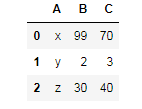

In [54]:
df = pd.DataFrame([['x',99,70],['y',2,3],['z',30,40]], columns=['A','B','C'])
df

,A,B,C
0,x,99,70
1,y,2,3
2,z,30,40


16. ❏ Examine the data types of the data frame.

In [65]:
df.dtypes

A     object
B    float64
C    float64
dtype: object

17. ❏ Modify the **B** and **C** columns to be floats using the **.astype()** method and reexamine the data types

In [102]:
df["B"] = df["B"].astype(float, copy=False, errors='raise')
df["C"] = df["B"].astype(float, copy=False, errors='raise')

#better method
df[['B', 'C']] = df[['B', 'C']].astype(float)

18. ❏ Read in the two data sets, data1.csv and data2.csv, and bind them together by row.

In [68]:
data1 = pd.read_csv("data1.csv")
data1 



,Subtype,Gender,Expression
0,A,M,-0.54
1,A,F,-0.80
2,B,M,-1.03
3,C,M,-0.41


In [69]:
data2 = pd.read_csv("data2.csv")
data2

,Subtype,Gender,Expression
0,D,F,2.50
1,D,F,-0.15
2,D,M,-0.20
3,D,F,-0.04


In [76]:
joinedData = pd.concat((data1, data2), axis=0)
joinedData


,Subtype,Gender,Expression
0,A,M,-0.54
1,A,F,-0.80
2,B,M,-1.03
3,C,M,-0.41
0,D,F,2.50
1,D,F,-0.15
2,D,M,-0.20
3,D,F,-0.04


19. ❏ Write and execute a function that prints your name.

In [77]:
def name():
    print("Evan")

name()

Evan


20. ❏ Write a function that accepts a value as an input parameter and returns its
squared value.

In [79]:
def square(x):
    return x**2

square(3)

9

21. ❏ Perform a **principal component analysis (PCA)** on the iris data set<br><br>
*Hint: Exclude the Species attribute*

In [80]:
iris = pd.read_csv("iris.csv")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [83]:
iris.drop(columns="species", inplace=True)

In [84]:
iris

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [85]:
from sklearn.decomposition import PCA

In [89]:
columnCount = iris.columns.shape[0]
pca = PCA(n_components=columnCount)
pca.fit(iris)


PCA(n_components=4)

22. ❏ View the proportion of the total variance explained by each component, using the **.explained_variance_ratio_**

In [91]:
print(pca.explained_variance_ratio_)


array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

In [94]:
import matplotlib.pyplot as plt
%matplotlib inline

<BarContainer object of 4 artists>

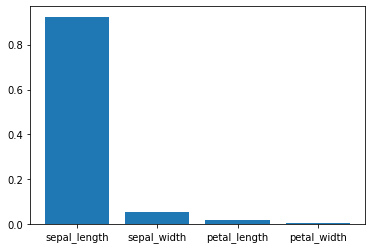

In [97]:
plt.bar(iris.columns, pca.explained_variance_ratio_)

23. ❏ View the coefficients of the new variables

In [92]:
pd.DataFrame(pca.components_, columns=iris.columns)

,sepal_length,sepal_width,petal_length,petal_width
0,0.361387,-0.084523,0.856671,0.358289
1,0.656589,0.730161,-0.173373,-0.075481
2,-0.582030,0.597911,0.076236,0.545831
3,-0.315487,0.319723,0.479839,-0.753657


## <center>**Congratulations! You have successfully carried out some transformations on various data sets within Python.**</center>

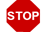

# <center>**This is the end of the exercise.**</center>

<class 'pandas.core.frame.DataFrame'>
[0.72962445 0.22850762 0.03668922 0.00517871]


<BarContainer object of 4 artists>

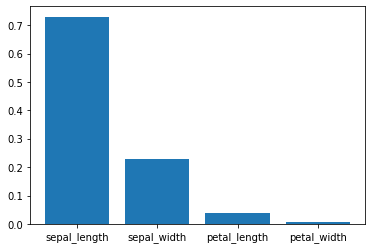

In [100]:
from sklearn import preprocessing
scaledIris = pd.DataFrame(preprocessing.scale(iris), columns=iris.columns)
print(type(scaledIris)) 

columnCount = scaledIris.columns.shape[0]
scaledPca = PCA(n_components=columnCount)
scaledPca.fit(scaledIris)

print(scaledPca.explained_variance_ratio_)
plt.bar(scaledIris.columns, scaledPca.explained_variance_ratio_)